[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyMarkovClustering/blob/main/docs/example.ipynb)

In [1]:
# !pip install pymarkovclustering
# !apt install graphviz graphviz-dev
# !pip install networkx[default,extra]

### 1. MCL Simple Edges

In [2]:
import pymarkovclustering as pymcl

# List of edges (source, target, weight)
edges = [
    ("A", "B", 10),
    ("A", "C", 10),
    ("B", "C", 2),
    ("D", "E", 5),
    ("F", "G", 2),
    ("H", "I", 0.0),
]
# load edges as matrix, MCL, extract clusters
matrix, labels = pymcl.edges_to_sparse_matrix(edges)
mcl_matrix = pymcl.mcl(matrix, quiet=False)
clusters = pymcl.extract_clusters(mcl_matrix, labels)

for i, cluster in enumerate(clusters, 1):
    print(f"Cluster{i:03d}: {cluster}")

2025-05-11 13:00:29 | INFO | Starting MCL (inflation=2.0, max_iter=100)
2025-05-11 13:00:29 | INFO | Load 9x9 matrix with 10 entries
2025-05-11 13:00:29 | INFO | Iteration 001 done --- 0.00[s]
2025-05-11 13:00:29 | INFO | Iteration 002 done --- 0.00[s]
2025-05-11 13:00:29 | INFO | Iteration 003 done --- 0.00[s]
2025-05-11 13:00:29 | INFO | Iteration 004 done --- 0.00[s]
2025-05-11 13:00:29 | INFO | Iteration 005 done --- 0.00[s]
2025-05-11 13:00:29 | INFO | Iteration 006 done --- 0.00[s]
2025-05-11 13:00:29 | INFO | Iteration 007 done --- 0.00[s]
2025-05-11 13:00:29 | INFO | 5 clusters found
2025-05-11 13:00:29 | INFO | Finished MCL (elapsed time: 0.01[s])


Cluster001: ['A', 'B', 'C']
Cluster002: ['D', 'E']
Cluster003: ['F', 'G']
Cluster004: ['H']
Cluster005: ['I']


### 2. MCL Random Edges

In [3]:
import pymarkovclustering as pymcl

# Generate random edges for MCL test
edges = pymcl.random_edges(30, min_cluster_size=2, max_cluster_size=6)
print(f"Edges: {edges}\n")

# easymcl automates load edges as matrix, MCL, extract clusters
clusters = pymcl.easymcl(edges, inflation=2.0)

for i, cluster in enumerate(clusters, 1):
    print(f"Cluster{i:03d}: {cluster}")

Edges: [('5_2', '5_5', 0.625), ('2_1', '2_5', 0.602), ('6_4', '6_5', 0.301), ('5_3', '5_6', 0.73), ('5_2', '5_6', 0.612), ('5_3', '5_5', 0.333), ('2_3', '2_5', 0.33), ('5_1', '5_3', 0.918), ('1_2', '1_4', 0.218), ('7_1', '7_2', 0.291), ('4_2', '4_3', 0.553), ('3_1', '3_2', 0.354), ('5_3', '5_4', 0.828), ('2_2', '2_4', 0.099), ('6_2', '6_5', 0.875), ('2_1', '2_3', 0.533), ('2_1', '2_4', 0.705), ('5_4', '5_5', 0.704), ('1_1', '1_4', 0.968), ('2_2', '2_5', 0.074), ('5_1', '5_5', 0.093), ('1_2', '1_3', 0.892), ('6_2', '6_3', 0.091), ('1_3', '1_5', 0.095), ('6_2', '6_4', 0.993), ('5_2', '5_4', 0.785), ('1_1', '1_3', 0.83), ('4_3', '4_4', 0.521), ('6_1', '6_2', 0.222), ('4_1', '4_3', 0.64), ('2_3', '2_4', 0.85), ('4_1', '4_2', 0.316), ('6_1', '6_5', 0.543), ('6_3', '6_5', 0.489), ('5_1', '5_6', 0.84), ('4_1', '4_4', 0.204), ('1_3', '1_4', 0.14), ('1_2', '1_5', 0.139), ('7_1', '7_3', 0.125), ('6_1', '6_3', 0.803), ('5_4', '5_6', 0.063), ('2_2', '2_3', 0.147), ('2_1', '2_2', 0.987), ('4_2', '4

### 3. MCL Visualization

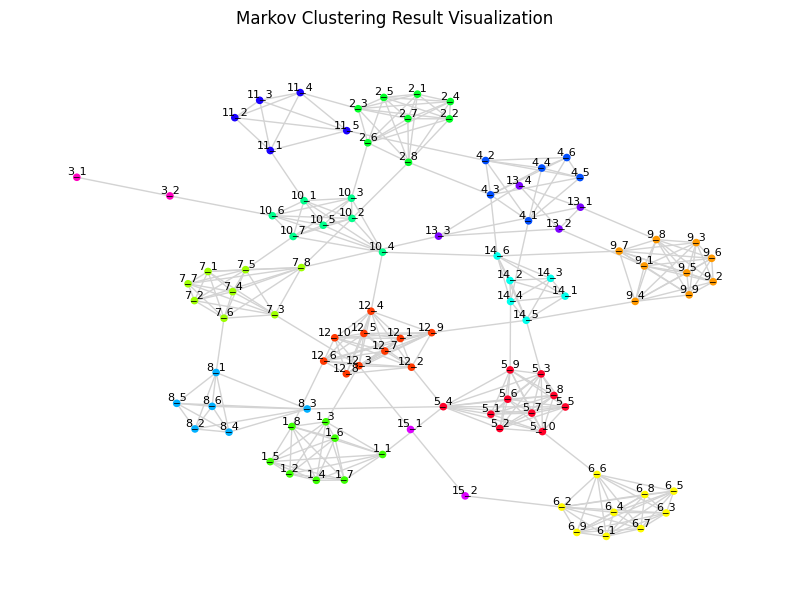

In [4]:
import pymarkovclustering as pymcl

# Generate random edges for MCL test
edges = pymcl.random_edges(100, random_add_rate=0.1, min_cluster_size=2)

# easymclviz automates load edges as matrix, MCL, extract clusters, visualization
fig = pymcl.easymclviz(edges, inflation=2.0, show_label=True)
fig.suptitle("Markov Clustering Result Visualization")
fig.savefig("clusters.png", dpi=100)